In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/demand.csv")
data

ID  Store ID  Total Price  Base Price  Units Sold
0            1      8091      99.0375    111.8625          20
1            2      8091      99.0375     99.0375          28
2            3      8091     133.9500    133.9500          19
3            4      8091     133.9500    133.9500          44
4            5      8091     141.0750    141.0750          52
...        ...       ...          ...         ...         ...
150145  212638      9984     235.8375    235.8375          38
150146  212639      9984     235.8375    235.8375          30
150147  212642      9984     357.6750    483.7875          31
150148  212643      9984     141.7875    191.6625          12
150149  212644      9984     234.4125    234.4125          15

[150150 rows x 5 columns]

In [3]:
data.isnull().sum()

ID             0
Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64

In [4]:
data.shape

(150150, 5)

In [7]:
data.dropna(inplace = True)

In [8]:
data.shape

(150149, 5)

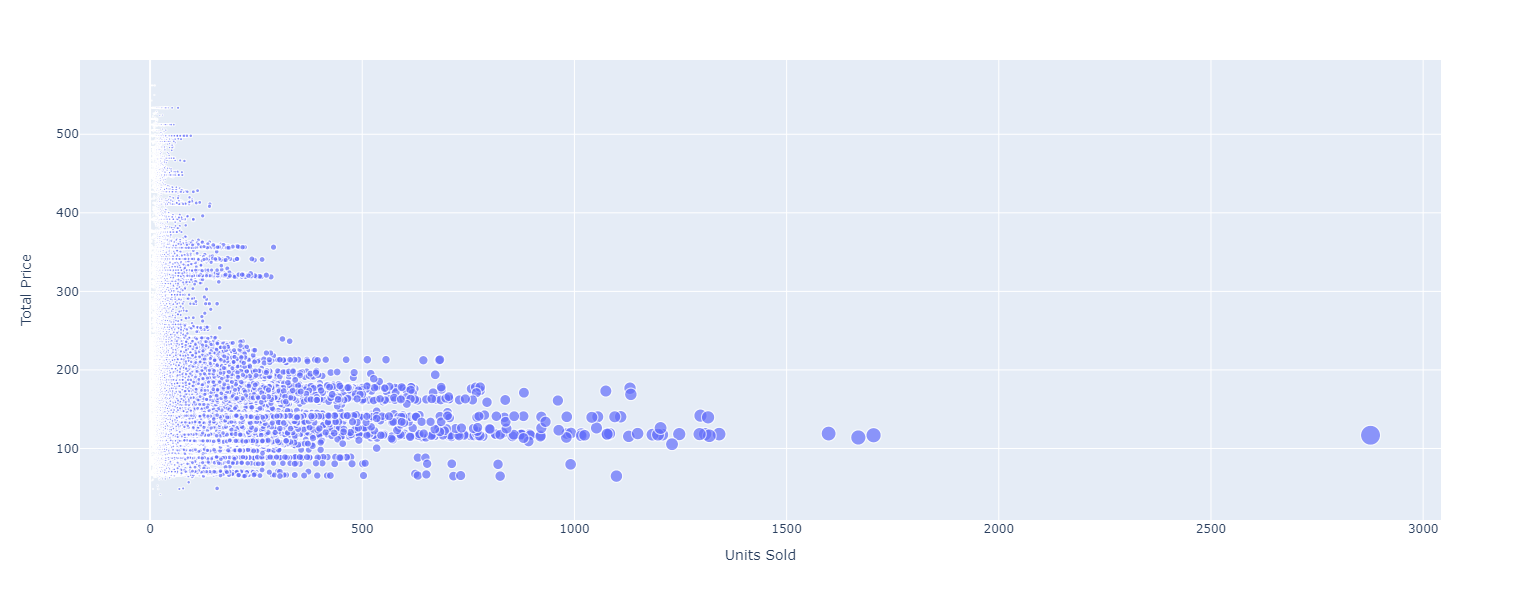

In [13]:
fig = px.scatter(data, x = "Units Sold", y = "Total Price", size = "Units Sold", height = 600, width = 1200)
fig.show()

In [14]:
print(data.corr())

                   ID  Store ID  Total Price  Base Price  Units Sold
ID           1.000000  0.007461     0.008473    0.018911   -0.010608
Store ID     0.007461  1.000000    -0.038315   -0.038855   -0.004369
Total Price  0.008473 -0.038315     1.000000    0.958885   -0.235625
Base Price   0.018911 -0.038855     0.958885    1.000000   -0.140022
Units Sold  -0.010608 -0.004369    -0.235625   -0.140022    1.000000


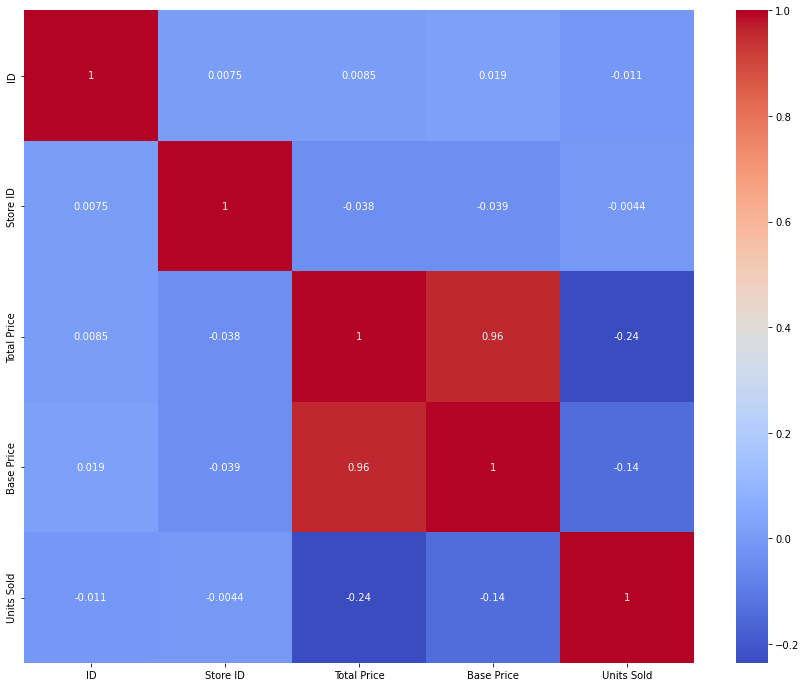

In [15]:
correlations = data.corr(method = "pearson")
plt.figure(figsize = (15, 12))
sns.heatmap(correlations, cmap = "coolwarm", annot = True)
plt.show()

In [32]:
x = data[["Total Price","Base Price"]].to_numpy()
y = data["Units Sold"]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [34]:
# features = "Total Price","Base Price"
features = np.array([[133.00, 140.00]])
model.predict(features)

array([27.])